# * Kurapati Venkatesh

# * 09012021

# * Topic: Naive Bayes ✨

# ---------------------------------------------------------------------------

## Problem Statement:

## This dataset contains information of users in social network. This social network has several business clients which can put their ads on social network and one of the Client has a car company who has just launched a luxury SUV for ridiculous price. Build the Bernoulli Naïve Bayes model using this dataset and classify which of the users of the social network are going to purchase this luxury SUV.

## -----------------------------------------------------------------------------------

### Problem Objective:

##### Build a model that would predict weather a user(s) would buy a car based on the users age and salary. Compare the predicted results with the real value.

### Business Background:

##### A Social Networkwith several business clients, advertise their business products and services on the platform. One of the clients is a car dealership, that want to sell their newly launched vehicle.

### Dataset:

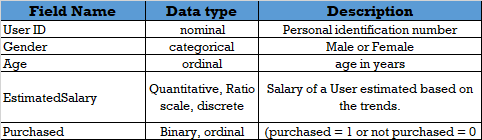

## Import libraries:

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [3]:
import warnings

warnings.filterwarnings('ignore')

## Import datasets:

In [4]:
df1  = pd.read_csv(r"G:\360digit\assignments meterial\Naivebayes\NB_Car_Ad.csv")

In [5]:
df1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df = df1.drop('User ID',axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [8]:
df.describe(include="all")

,Gender,Age,EstimatedSalary,Purchased
count,400,400.000000,400.000000,400.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,204,NaN,NaN,NaN
mean,NaN,37.655000,69742.500000,0.357500
std,NaN,10.482877,34096.960282,0.479864
min,NaN,18.000000,15000.000000,0.000000
25%,NaN,29.750000,43000.000000,0.000000
50%,NaN,37.000000,70000.000000,0.000000
75%,NaN,46.000000,88000.000000,1.000000


## Exploratory data analysis:

In [9]:
# view dimensions of dataset
df.shape

(400, 4)

We can see that there are 400 instances and 4 attributes in the data set.

#### Explore categorical variables:

In [10]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 1 categorical variables

The categorical variables are :

 ['Gender']


##### Missing values in categorical variable:

In [11]:
df[categorical].isnull().sum()

Gender    0
dtype: int64

We can see that there are no missing values in the categorical variables. I will confirm this further

#### Frequency counts of categorical variables
Now, I will check the frequency counts of categorical variables.

In [12]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

Female    204
Male      196
Name: Gender, dtype: int64


In [13]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

Female    0.51
Male      0.49
Name: Gender, dtype: float64


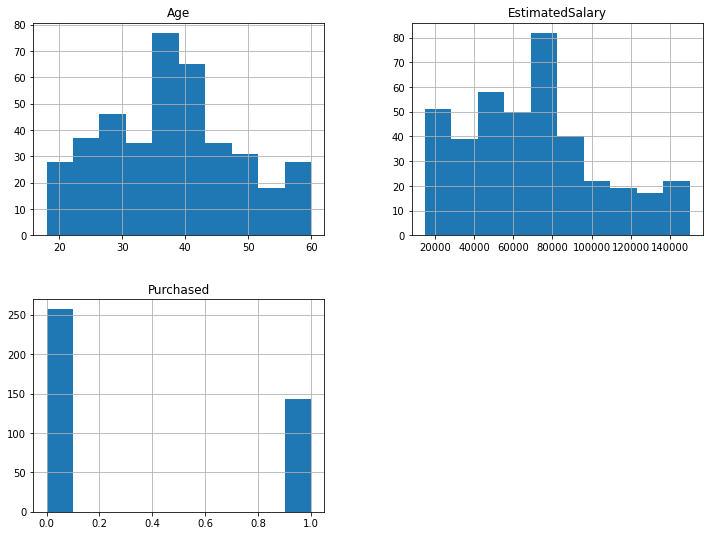

In [14]:
# Plot histogram for each numeric variable/attribute of the dataset

df.hist(figsize=(12,9))
plt.show()

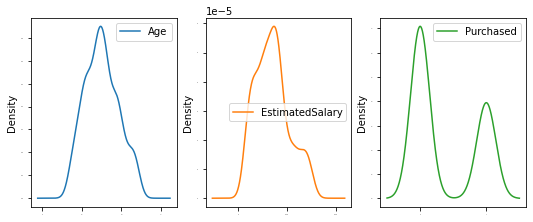

In [15]:
# Density plots

df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(12,16))
plt.show()

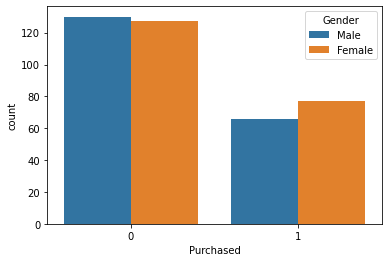

In [16]:
#Counting the Number of person purchased the car or not and diving them by their gender
sns.countplot(df['Purchased'],hue=df['Gender'])

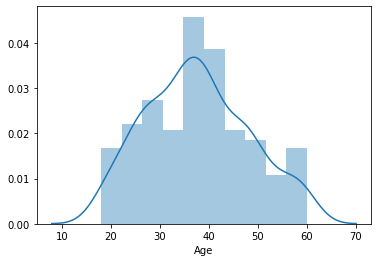

In [17]:
#Cheking the pattern of the Age of the persons of our dataset
sns.distplot(df['Age'])

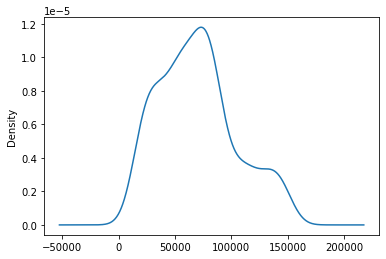

In [18]:
#Analysing the pattern of the estimated salary of the persons in our dfset
df['EstimatedSalary'].plot(kind='kde')

### correlation matrix:

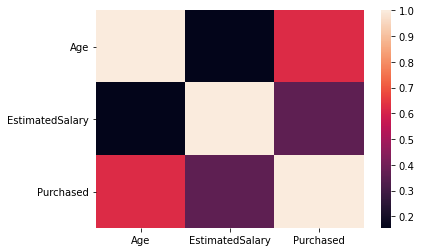

In [19]:
cor = df.corr()
sns.heatmap(cor)

### Scatter plot of two features, and pairwise plot:

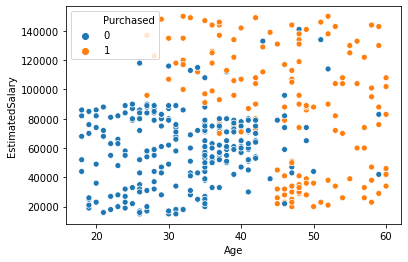

In [20]:
sns.scatterplot(df['Age'],df['EstimatedSalary'], hue=df['Purchased'])

No Correlation at all

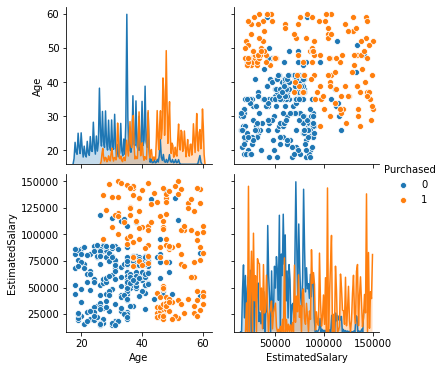

In [21]:
#pairwise plot of all the features
sns.pairplot(df ,hue='Purchased', diag_kws={'bw': 0.25})
plt.show()

In [22]:
X = df1.iloc[:, [ 2, 3]].values
y = df1.iloc[:, 4].values

Since our dataset containing character variables we have to encode it using LabelEncoder

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

## Splitting the dataset into the Training set and Test set:

We are performing a train test split on our dataset. We are providing the test size as 0.20, that means our training sample contains 320 training set and test sample contains 80 test set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling:

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fitting Naive Bayes to the Training set:

In [26]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

#### Predicting the Test set results:

In [27]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

### Making the Confusion Matrix:

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [29]:
cm

array([[55,  3],
       [ 4, 18]], dtype=int64)

In [30]:
ac

0.9125

In [31]:
X_train.shape

(320, 2)

In [32]:
y_train.shape

(320,)

### Visualising the Training set results:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


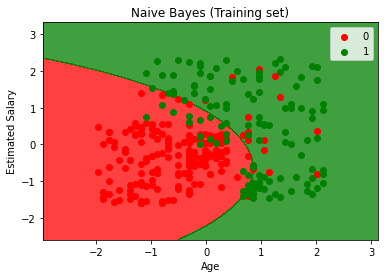

In [33]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


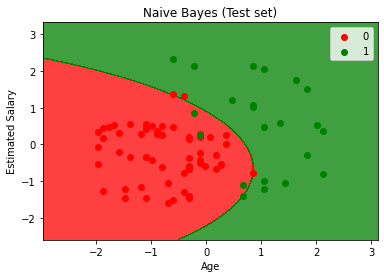

In [34]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [37]:
#Checking the performace of the model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [38]:
print('Confusion Matrix - \n',confusion_matrix(y_test,y_pred))
print('\n')
print('Classification Report - \n',classification_report(y_test,y_pred))
print('\n')
print('Accuracy Of Our Model -',accuracy_score(y_test,y_pred))

Confusion Matrix - 
 [[55  3]
 [ 4 18]]


Classification Report - 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        58
           1       0.86      0.82      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.88      0.89        80
weighted avg       0.91      0.91      0.91        80



Accuracy Of Our Model - 0.9125


## Conclusion:

Overall my model is having an accuracy of 0.9125.